# Theory/Computation Problems

### Problem 1 (20 points) 
Show that the stationary point (zero gradient) of the function
$$
\begin{aligned}
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
\end{aligned}
$$
is a saddle (with indefinite Hessian). Find the directions of downslopes away from the saddle. Hint: Use Taylor's expansion at the saddle point. Find directions that reduce $f$.

### Problem 2 (50 points) 

* (10 points) Find the point in the plane $x_1+2x_2+3x_3=1$ in $\mathbb{R}^3$ that is nearest to the point $(-1,0,1)^T$. Is this a convex problem? Hint: Convert the problem into an unconstrained problem using $x_1+2x_2+3x_3=1$.

* (40 points) Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes along with a short summary including (1) the initial points tested, (2) corresponding solutions, (3) a log-linear convergence plot.

### Problem 3 (10 points) 
Let $f(x)$ and $g(x)$ be two convex functions defined on the convex set $\mathcal{X}$. 
* (5 points) Prove that $af(x)+bg(x)$ is convex for $a>0$ and $b>0$. 
* (5 points) In what conditions will $f(g(x))$ be convex?

### Problem 4 (bonus 10 points)
Show that $f({\bf x}_1) \geq f(\textbf{x}_0) + 
    \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ for a convex function $f(\textbf{x}): \mathcal{X} \rightarrow \mathbb{R}$ and for $\textbf{x}_0$, $\textbf{x}_1 \in \mathcal{X}$. 

# Design Problems

### Problem 5 (20 points) 
Consider an illumination problem: There are $n$ lamps and $m$ mirrors fixed to the ground. The target reflection intensity level is $I_t$ . The actual reflection intensity level on the $k_th$ mirror can be computed as $\textbf{a}_k^T \textbf{p}$, where $\textbf{a}_k$ is given by the distances between all lamps to the mirror, and $\textbf{p}:=[p_1,...,p_n]^T$ are the power output of the lamps. The objective is to keep the actual intensity levels as close to the target as possible by tuning the power output $\textbf{p}$.

* (5 points) Formulate this problem as an optimization problem. 
* (5 points) Is your problem convex?
* (5 points) If we require the overall power output of any of the $n$ lamps to be less than $p^*$, will the problem have a unique solution?
* (5 points) If we require no more than half of the lamps to be switched on, will the problem have a unique solution?

Problem 1: System of equations solution = stationary point 

In [3]:
import numpy as np
import matplotlib

a=np.array([[4,-4],[-4,3]])
b=np.array([[0],[-1]])

x=np.matmul(np.linalg.inv(a),b)

print(x)

np.allclose(np.dot(a, x), b)

[[1.]
 [1.]]


True

In [4]:
import numpy as np

a=np.array([[10,12],[12,20]])
b=np.array([[8],[14]])

x=np.matmul(np.linalg.inv(a),b)

print(x)

np.allclose(np.dot(a, x), b)

[[-0.14285714]
 [ 0.78571429]]


True

Problem 2: System of equations solution 

[-1.07143646 -0.14282542  0.78569576]


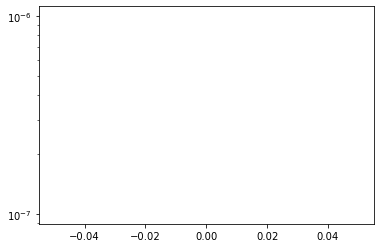

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from line_search_bt import *

x_i=np.array([1,1])
x_init=x_i
convergence_criteria=.0001
alpha=1
conv=1
error=1
err=[]
itt=[]
count=1

xstar=[-.143, .786]

def func(x):
    return 5*x[0]**2+12*x[0]*x[1]-8*x[0]+10*x[1]**2-14*x[1]+5

def gradient(x):
   return np.array([10*x[0]+12*x[1]-8,12*x[0]+20*x[1]-14])

while conv > convergence_criteria:

    x_k=x_i

    alpha=line_search_bt(x_i,func,gradient,alpha,.5,.5)
    
    x_i=x_k-alpha*gradient(x_k)

    error=abs(func(x_k)-func(xstar))

    conv=np.linalg.norm(gradient(x_i))
    
    err.append(float(error))

  

x=np.array([-2*x_i[0]-3*x_i[1]+1,x_i[0],x_i[1]])

print(x)

plt.plot(error)
plt.yscale("log")

[-1.07144129 -0.14285218  0.78571522]


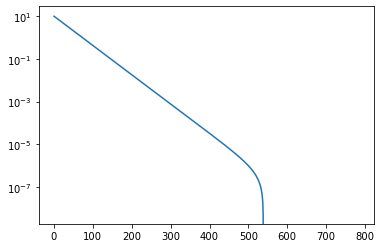

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from line_search_bt import*

x_i=np.array([1,1])
convergence_criteria=.0001
conv=1
alpha=1
error=1
err=[]
itt=[]

xstar=[-.143, .786]

def func(x):
    return 5*x[0]**2+12*x[0]*x[1]-8*x[0]+10*x[1]**2-14*x[1]+5

def gradient(x):
   return np.array([10*x[0]+12*x[1]-8,12*x[0]+20*x[1]-14])

Hessian=np.array([[10,12],[12,20]])

while conv > convergence_criteria:
    x_k=x_i
    alpha=line_search_bt(x_i,func,gradient,alpha,.5,.5)
    x_i=x_k-alpha*np.matmul(np.linalg.inv(Hessian),gradient(x_k))
    error=func(x_k)-func(xstar)
    err.append(float(error))
    conv=np.linalg.norm(gradient(x_i))
    


x=np.array([-2*x_i[0]-3*x_i[1]+1,x_i[0],x_i[1]])
print(x)

plt.plot(err)
plt.yscale("log")